<a href="https://colab.research.google.com/github/SiharaVikashIITD/Data-Analytics/blob/main/Facebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Facebook Marketplace Dataset
The Facebook Live Sellers in Thailand dataset contains information about the Facebook pages of 10 Thai fashion and cosmetics retail sellers.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('Facebook_Marketplace_data.csv')

In [ ]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(7050, 16)

### 1.	How does the time of upload (`status_published`)  affects the `num_reaction`?

In [ ]:
#convrting 'status_published' to datetime and extracting hour
df['status_published']=pd.to_datetime(df['status_published'])
df['hour_published'] =df['status_published'].dt.hour

#Grouping by hour and calculating the mean of 'num_reactions'

hourly_reactions=df.groupby('hour_published')['num_reactions'].mean().reset_index()
print(hourly_reactions)

    hour_published  num_reactions
0                0     261.839474
1                1     203.315725
2                2     163.907618
3                3     290.270208
4                4     242.685864
5                5     293.870968
6                6     340.213198
7                7     183.301549
8                8     204.796897
9                9     205.780761
10              10     234.508333
11              11     180.639456
12              12     196.053763
13              13     176.875000
14              14     261.333333
15              15     341.666667
16              16     283.250000
17              17     384.000000
18              18     351.750000
19              19     442.368421
20              20     417.288136
21              21     261.907895
22              22     238.376126
23              23     244.276850


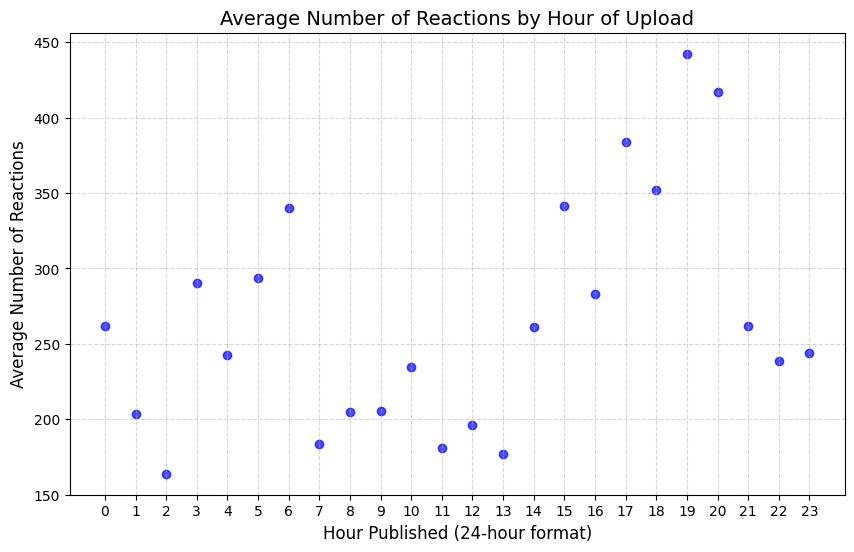

In [ ]:
# Scatter plot for hourly reactions
plt.figure(figsize=(10, 6))
plt.scatter(hourly_reactions['hour_published'], hourly_reactions['num_reactions'], color='blue', alpha=0.7)
plt.title('Average Number of Reactions by Hour of Upload', fontsize=14)
plt.xlabel('Hour Published (24-hour format)', fontsize=12)
plt.ylabel('Average Number of Reactions', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 2.	Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?

In [ ]:
# Calculating the correlation coefficient between num_reactions and other engagement metrics
corr_matrix =df[['num_reactions', 'num_comments', 'num_shares']].corr()
print(corr_matrix)

               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


### All Positively Correlated

Strength of Correlation:

0.00 to ±0.19: Very weak or no correlation.
±0.20 to ±0.39: Weak correlation.
±0.40 to ±0.59: Moderate correlation.
±0.60 to ±0.79: Strong correlation.
±0.80 to ±1.00: Very strong correlation.

### 3.	Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.

In [ ]:
KM_df=df[['status_type','num_reactions', 'num_comments', 'num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']]
KM_df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [ ]:
# One-hot encode the categorical column 'status_type'
df_encoded = pd.get_dummies(KM_df, columns=['status_type'], drop_first=True)

# Select the relevant columns (after encoding)
numeric_features = df_encoded.select_dtypes(include=['number'])

# Handle missing values (if any)
numeric_features = numeric_features.fillna(0)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

print("Scaled Features (first 5 rows):\n", scaled_features[:5])

Scaled Features (first 5 rows):
 [[ 0.64610394  0.32335035  1.6868788   0.48272661  1.98326643  0.1961959
   0.07671305  0.47357035 -0.15574803]
 [-0.17319166 -0.25220622 -0.3041444  -0.14472021 -0.3184544  -0.147879
  -0.17600986 -0.152587   -0.15574803]
 [-0.00673846  0.01308938  0.12901714 -0.02457082  0.2069384  -0.03318737
   0.07671305 -0.152587   -0.15574803]
 [-0.25749912 -0.25220622 -0.3041444  -0.23149477 -0.3184544  -0.147879
  -0.17600986 -0.152587   -0.15574803]
 [-0.03700268 -0.25220622 -0.3041444  -0.02457082 -0.09328605 -0.147879
  -0.17600986 -0.152587   -0.15574803]]


In [ ]:
X=scaled_features
y=df['status_type']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.cluster import KMeans
Model=KMeans(n_clusters=3,random_state=42)
Model.fit(scaled_features)

KMeans(n_clusters=3, random_state=42)

### 4.	Use the elbow method to find the optimum number of clusters.

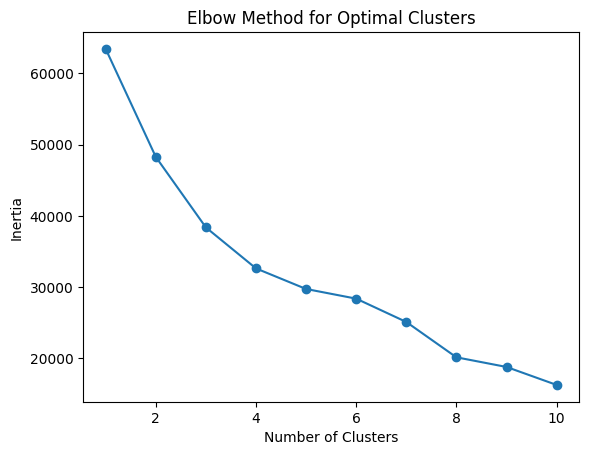

In [ ]:
# Elbow method to determine the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


From the Elbow Method plot, the optimal number of clusters (k) is determined at the point where the "elbow" occurs, which is the point where the inertia (sum of squared distances) starts decreasing more slowly.

In this plot, the "elbow" appears around k = 4, as the rate of decrease in inertia significantly slows down after this point. Therefore, the optimal k for K-means clustering is likely 4.

### 5.	What is the count of different types of posts in the dataset?

In [ ]:
# Count the number of each type of post
post_type_counts = df['status_type'].value_counts()
print(post_type_counts)

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


### 6.	What is the average value of num_reaction, num_comments, num_shares for each post type?

In [ ]:
# Calculate average values for each post type
averages = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean().reset_index()
print(averages)

  status_type  num_reactions  num_comments  num_shares
0        link     370.142857      5.698413    4.396825
1       photo     181.290345     15.993470    2.553871
2      status     438.783562     36.238356    2.558904
3       video     283.409597    642.478149  115.679949
